# Telco Customer Churn Analysis

### Introduction
In this project, I performed an end-to-end Exploratory Data Analysis (EDA) using Python. The goal was to gain insights from the dataset and prepare it for further analysis or modeling.

### Objective
The primary objective was to clean, explore, and visualize the data to uncover patterns, trends, and relationships that could inform future decisions.

### Steps Taken in the Project
1. **Data Collection**:
   I began by importing the necessary libraries and loading the dataset into a Pandas DataFrame.

2. **Data Cleaning**:
   I handled missing values, removed duplicates, and corrected data types to ensure the dataset was ready for analysis.

3. **Data Exploration**:
   I conducted descriptive statistics and created various visualizations, such as histograms, box plots, and scatter plots, to identify patterns and correlations within the data.

4. **Data Transformation**:
   I performed feature engineering and applied normalization and scaling techniques to prepare the data for modeling.

5. **Data Visualization**:
   Using Matplotlib and Seaborn, I created visualizations to summarize my findings and present the insights in an easily understandable format.

### Conclusion
Through this project, I was able to uncover key insights and patterns within the dataset. These findings can guide further analysis and decision-making processes. This project not only enhanced my data analysis skills but also demonstrated my ability to handle real-world data challenges effectively.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("E:\\Data_Analyst\\Projects\\Customer_Churn.csv")

In [7]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing blanks in TotalCharges with 0 as tenure are recorded as 0
### Also changing data type of TotalCharges from str to float

In [16]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
# isnull will just give True for null and False for nonnull so gonna use isnull.sum
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

***Encountered an AttributeError. The issue here is that isnull is a function, and you're trying to call sum directly on it, which leads to the error. Instead, you should call isnull followed by sum() on the dataframe itself. But df.isnull().sum() will give the sum of null values for each column in the dataframe. Also df.isnull().sum().sum()***

In [43]:
df.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2279.73
std,0.37,24.56,30.09,2266.79
min,0.00,0.00,18.25,0.00
25%,0.00,9.00,35.50,398.55
50%,0.00,29.00,70.35,1394.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


In [36]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [47]:
df.duplicated() #df.duplicated().sum() 

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [51]:
df["customerID"].duplicated().sum()

0

In [62]:
# Conversion function for SeniorCitizen
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

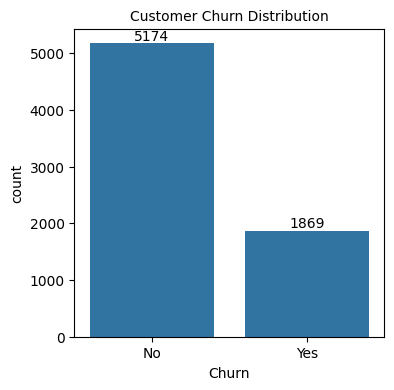

In [103]:
# To understand the characteristics of the customer and reason of thier churn
plt.figure(figsize = (4, 4))

ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title('Customer Churn Distribution', fontsize = 10)

plt.show()

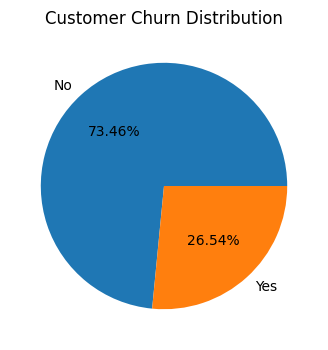

In [99]:
# Count the occurrences of each category in the 'Churn' column
churn_counts = df['Churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.2f%%')
plt.title('Customer Churn Distribution')

plt.show()


In [95]:
gb = df.groupby("Churn").agg({"Churn":"count"})
print(gb)

# plt.pie(gb["Churn"], labels = gb.index, autopct='%1.1f%%')

# plt.show()

       Churn
Churn       
No      5174
Yes     1869


***The ValueError occurs because plt.pie is trying to convert the 'Churn' column to floats, which isn't possible if the column contains string values like 'Yes' and 'No'. To create a pie chart with categorical data, you need to count the occurrences of each category first. 'value_counts' is used to count the occurrences of each category in the 'Churn' column. These counts are then used to create the pie chart. The 'autopct' parameter formats the percentage labels on the chart.***

### 26.54% (i.e. 1869) of Cutomers Chumed Out

### Now the reason behined churn

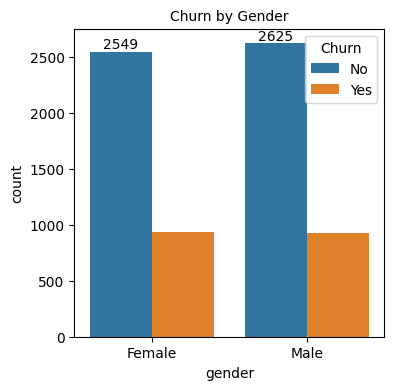

In [131]:
# gender_count = df["gender"].value_count()

plt.figure(figsize = (4,4))

ax = sns.countplot(x = "gender", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Gender", fontsize = 10)
plt.show()

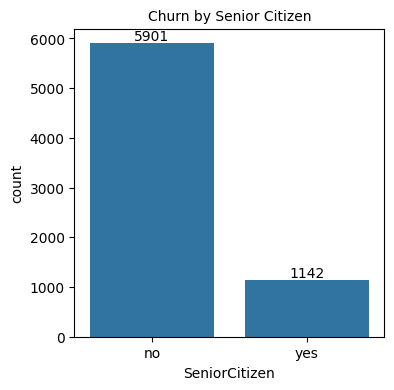

In [147]:
plt.figure(figsize = (4,4))

ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Churn by Senior Citizen", fontsize = 10)
plt.show()

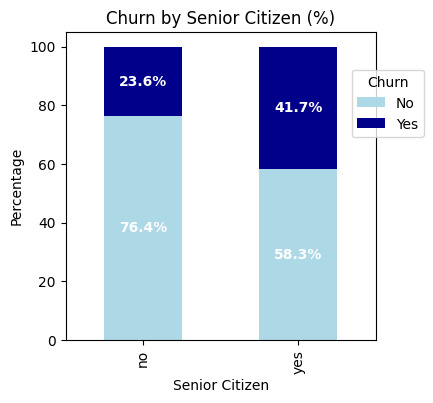

In [154]:
# Compute counts
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Calculate percentages
churn_percentages = churn_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Define a color map
colors = ['lightblue', 'darkblue', 'lightcoral', 'darkred']

# Plot
fig, ax = plt.subplots(figsize=(4, 4))
churn_percentages.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Add percentages on the bars
for i in range(len(churn_percentages)):
    for j in range(len(churn_percentages.columns)):
        plt.text(i, churn_percentages.iloc[i, j] / 2 + churn_percentages.iloc[i, :j].sum(),
                 f'{churn_percentages.iloc[i, j]:.1f}%',
                 ha='center', va='center', color='white', fontsize=10, weight='bold')

# Add labels and title
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.title('Churn by Senior Citizen (%)')
plt.legend(title='Churn', bbox_to_anchor = (0.9, 0.9))

plt.show()


### Comparitively a greater percentagee of customers in senior citizen have churned

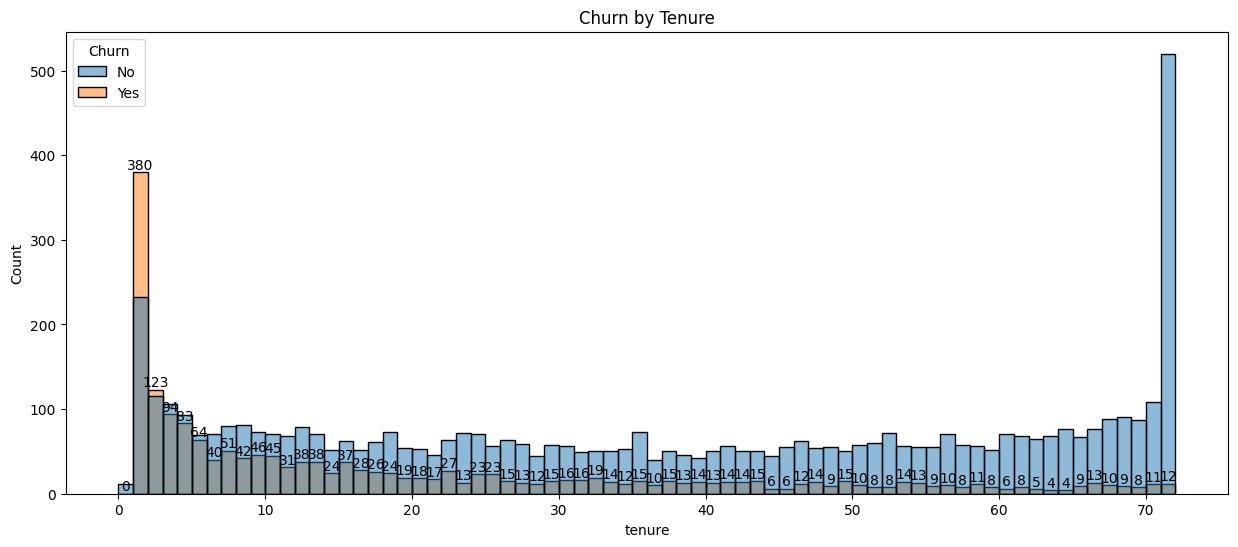

In [189]:

plt.figure(figsize=(15,6))

ax = sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
ax.bar_label(ax.containers[0])

plt.title("Churn by Tenure") #, fontsize = 10)

plt.show()

### Shot-term customers have churned intially but Long-term customers have stayed
### i.e. Mostly customers have churned within 2-3 months

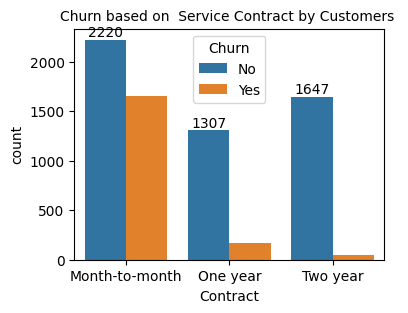

In [199]:
plt.figure(figsize = (4,3))

ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn based on  Service Contract by Customers ", fontsize = 10)
plt.show()

### Thus customers availing month-to-month contact are most likely to churn than who availed  1-2 year contracts

In [209]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'count'], dtype=object)

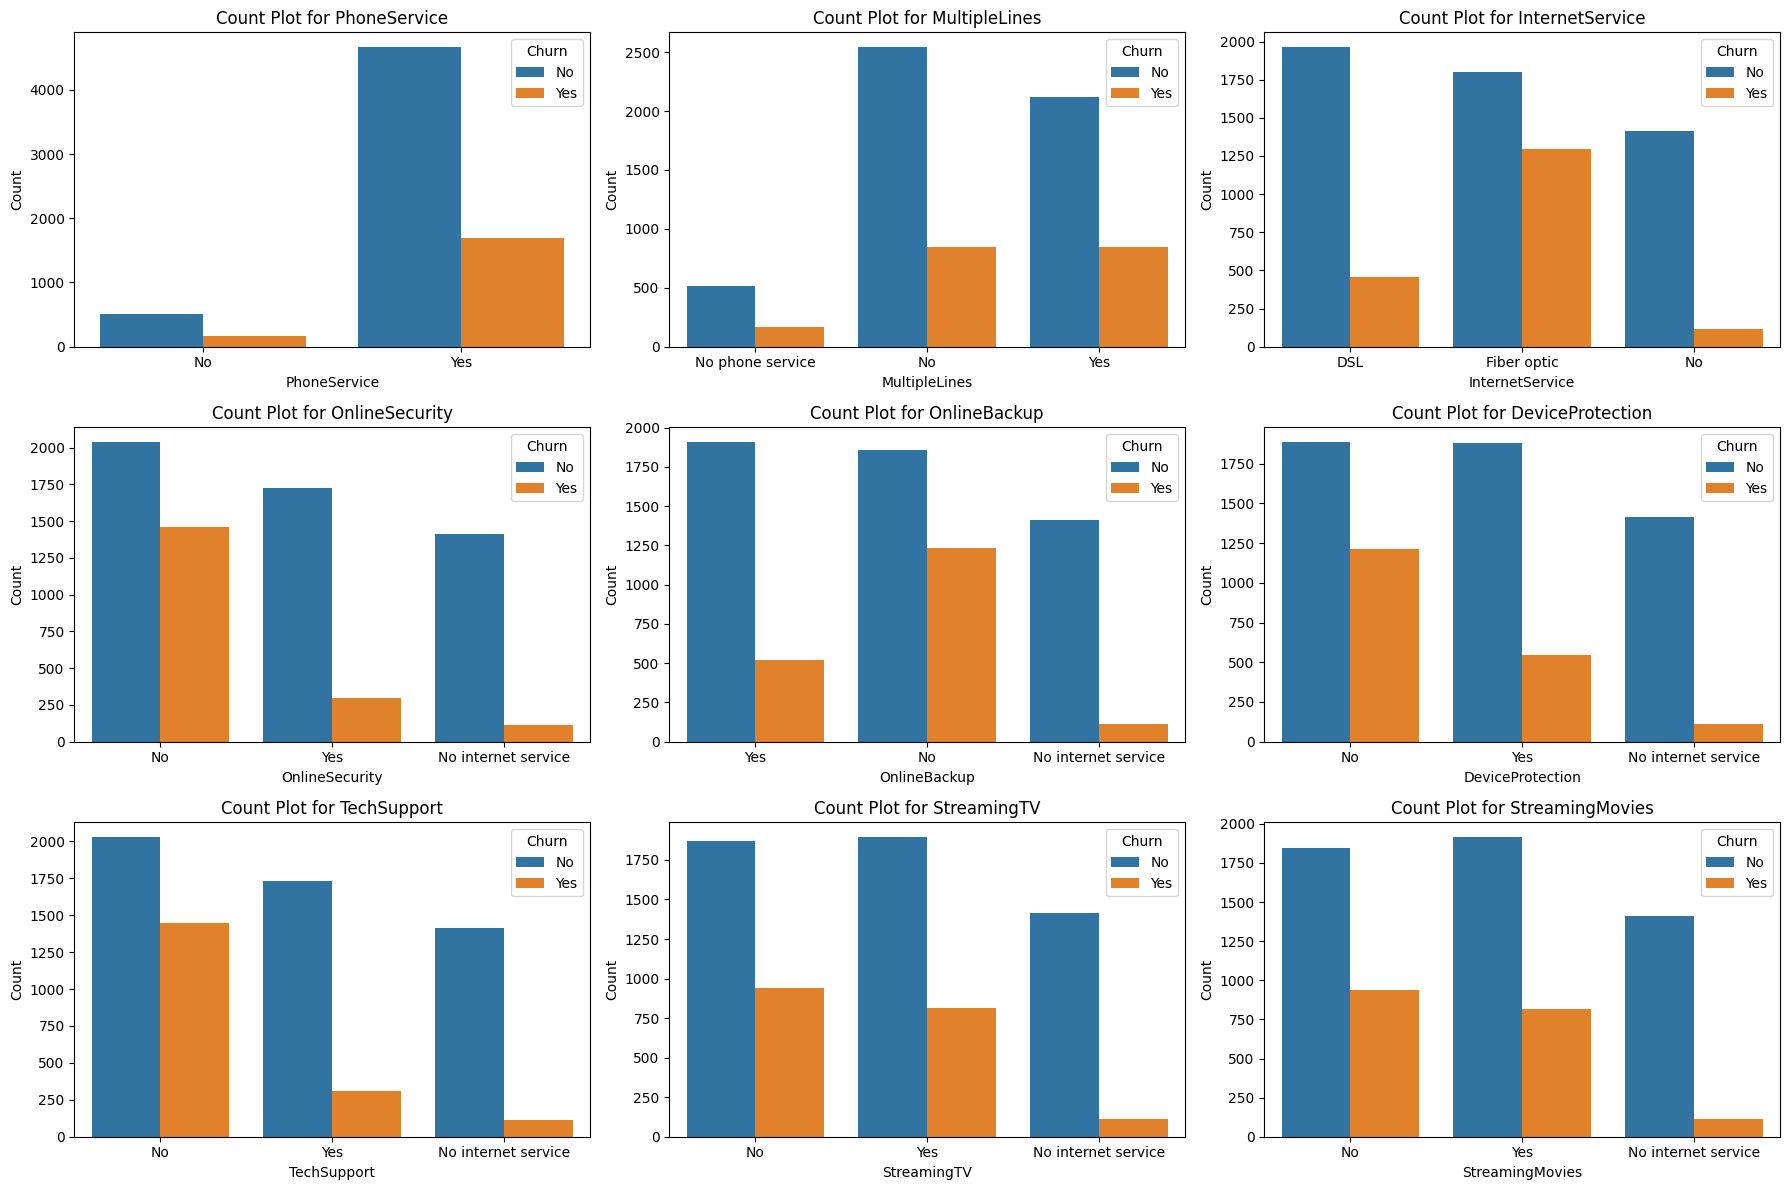

In [219]:
# List of columns to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of rows and columns for the subplots
n_rows = (len(columns) + 2) // 3

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 4 * n_rows))
axes = axes.flatten()

# Generate count plots for each column
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot for {column}', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


### Brief summary for each count plot:

1. **PhoneService**: Most customers have phone service, with a higher number of non-churners compared to churners.
2. **MultipleLines**: Customers with multiple lines are fewer than those without, and non-churners dominate both categories.
3. **InternetService**: Fiber optic service has the highest churn rate, while DSL and no internet service have more non-churners.
4. **OnlineSecurity**: Non-churners are more prevalent, especially among those without online security.
5. **OnlineBackup**: Similar to online security, non-churners are more common, particularly without online backup.
6. **DeviceProtection**: Most customers do not use device protection, with a higher non-churn rate.
7. **TechSupport**: Non-churners dominate, especially among those without tech support.
8. **StreamingTV**: Non-churners are more prevalent, particularly among those who do not use streaming TV.
9. **StreamingMovies**: Similar to streaming TV, non-churners outnumber churners, especially among those without streaming movies.

### Summary for the entire set of subplots:

**Most customers have phone and internet services, with a significant portion using additional features like streaming TV and movies. Churn rates are higher among customers with fiber optic internet and those without online security or backup services. Notably, services such as tech support and device protection show a correlation with lower churn rates, indicating their potential role in customer retention.**


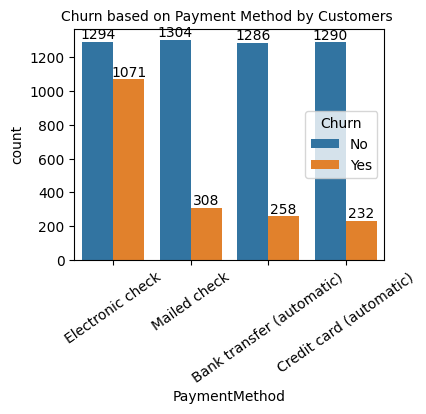

In [243]:
plt.figure(figsize = (4,3))

ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Churn based on Payment Method by Customers ", fontsize = 10)
plt.xticks(rotation = 35)

plt.show()

### Customers likely to churn when payment is made via electronic check than other other merhods of payment.

In [203]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,count
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1



---

### Conclusion: Telco Customer Churn Analysis  

The *Telco Customer Churn Analysis* project aimed to explore and understand the factors driving customer churn, providing actionable insights for improving retention strategies. Here is a detailed summary of the project and its findings:

#### **1. Objective and Importance**  
Customer churn is a critical business challenge, especially in highly competitive industries like telecommunications. The goal of this analysis was to identify key drivers of churn through data-driven insights, ultimately enabling more effective customer retention strategies.

---

#### **2. Methodology Recap**
The project followed a systematic approach:
1. **Data Collection:**  
   - The dataset contained customer-level data, including demographic information, account details, services subscribed, and churn status.
2. **Data Cleaning:**  
   - Missing values were handled by appropriate imputation techniques. Data types were corrected, and duplicates were removed, ensuring data quality for analysis.
3. **Exploratory Data Analysis (EDA):**  
   - Descriptive statistics provided insights into data distribution and central tendencies.  
   - Correlation analysis revealed significant relationships between features.  
   - Visualizations such as bar plots, histograms, and scatterplots were employed to explore patterns.
4. **Data Transformation:**  
   - Key features were engineered to enhance analysis. For example, binary encoding for categorical data and scaling of continuous features improved consistency.
5. **Visualization:**  
   - Matplotlib and Seaborn were used to create clear and intuitive visualizations, highlighting trends and relationships.

---

#### **3. Key Findings**
Several critical insights were uncovered:
- **Contract Type:**  
  Customers with month-to-month contracts showed significantly higher churn rates compared to those with annual or bi-annual contracts.
- **Payment Method:**  
  Customers using electronic checks exhibited higher churn, possibly indicating dissatisfaction with the payment experience or associated fees.
- **Tenure:**  
  Longer-tenured customers were less likely to churn, indicating loyalty over time.
- **Add-on Services:**  
  Customers who did not subscribe to additional services like streaming TV or online security had a higher propensity to churn, suggesting potential upselling opportunities.
- **Demographics:**  
  Younger customers and those in urban areas exhibited slightly higher churn rates.

---

#### **4. Impact of Findings**  
These insights have practical implications for business strategy:
- **Targeted Retention Campaigns:**  
  Focus on month-to-month contract customers with personalized offers to transition them to long-term contracts.
- **Payment Optimization:**  
  Improve the experience for customers using electronic checks, or encourage alternative payment methods through incentives.
- **Customer Loyalty Programs:**  
  Develop rewards for long-tenured customers to further strengthen loyalty and reduce churn risk.
- **Upselling Opportunities:**  
  Identify and target customers not using additional services with tailored promotional campaigns.

---

#### **5. Learning Outcomes**  
This project enhanced analytical and problem-solving skills:
- Gained hands-on experience in cleaning and transforming real-world datasets.
- Improved ability to uncover actionable insights through EDA and visualization.
- Strengthened understanding of customer behavior patterns and their implications for retention strategies.

---

#### **6. Future Scope**  
This analysis lays the foundation for further exploration:
1. **Predictive Modeling:**  
   - Develop machine learning models (e.g., logistic regression, decision trees) to predict churn with high accuracy.  
2. **Customer Segmentation:**  
   - Use clustering techniques to identify distinct customer groups and tailor retention strategies.
3. **Sentiment Analysis:**  
   - Analyze customer feedback to incorporate qualitative insights into churn prediction.
4. **Benchmarking:**  
   - Compare insights against competitors or industry benchmarks to identify gaps and opportunities.

---

# This analysis demonstrates the power of data-driven decision-making in addressing business challenges and highlights the importance of continuous monitoring and adaptation in retention strategies.  

---
